In [267]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder

# Load data

In [268]:
# load data
data = pd.DataFrame()

dataDir = 'data/query_log'
files = os.listdir(dataDir)
files = files[:]
for filename in files :        
    if filename.endswith(".csv"):
        newdata = pd.read_csv(dataDir + '/' + filename, names=['FileID','CustomerID','QueryTS','ProductID'], dtype=str)
        if(data.shape == (0,0)):
            data = newdata
        else:
            data = pd.concat([data, newdata])
        print(data.shape)

(475569, 4)
(992220, 4)
(1574171, 4)
(1981059, 4)
(2291772, 4)
(2708107, 4)
(3374585, 4)
(4026695, 4)
(4461062, 4)
(5085872, 4)
(5623071, 4)
(6060015, 4)
(8469323, 4)
(9055253, 4)
(9809517, 4)
(10116396, 4)
(10645784, 4)
(11207298, 4)
(11782928, 4)
(14659478, 4)
(17147572, 4)
(17731860, 4)
(19647046, 4)
(23226470, 4)
(23684647, 4)
(24479964, 4)
(25106105, 4)
(25677410, 4)
(26242383, 4)
(26810059, 4)
(29758302, 4)
(30377014, 4)
(30675259, 4)
(31003969, 4)
(31472643, 4)
(31937488, 4)
(32310881, 4)
(33012373, 4)
(33399260, 4)
(34227323, 4)
(34808243, 4)
(35220357, 4)
(35670856, 4)
(39213141, 4)
(39861328, 4)
(42540803, 4)
(43259996, 4)
(43862865, 4)
(45876256, 4)
(46549016, 4)
(47116693, 4)
(48845723, 4)
(49500934, 4)
(52846018, 4)
(53263916, 4)
(53745576, 4)
(56647504, 4)
(57112172, 4)
(57739330, 4)
(58118831, 4)
(59057928, 4)
(59666773, 4)
(60230077, 4)
(60551800, 4)
(61346770, 4)
(61831064, 4)
(62272961, 4)
(62688101, 4)
(63410889, 4)
(63972184, 4)
(64674234, 4)
(65207837, 4)
(65609178

In [90]:
# load label
train_label = pd.read_csv('data/training-set.csv', names=['FileID', 'isBad'])
train_label.head()

,FileID,isBad
0,0000e2398b12121a85166fed5fe2a3da,0
1,0001fe8dce14ce099aa6ca8ea5026ea7,0
2,00027f50019000accc492e5684efc818,0
3,00028c9da3573ec50db74b44310ae507,0
4,0003dc8130969abe688cadf5f14ea19f,0


In [91]:
data_withlabel = pd.merge(data, train_label, on='FileID', how='inner')

# Data exploration

In [92]:
data_withlabel.head(5)

,FileID,CustomerID,QueryTS,ProductID,isBad
0,dfccd8e23f0b03ec4db7a9a745ad7399,64573086fcfee53e8fa6d8f1f44101bb,1488326402,c105a0,0
1,dfccd8e23f0b03ec4db7a9a745ad7399,64573086fcfee53e8fa6d8f1f44101bb,1488326412,c105a0,0
2,dfccd8e23f0b03ec4db7a9a745ad7399,64573086fcfee53e8fa6d8f1f44101bb,1488326421,c105a0,0
3,dfccd8e23f0b03ec4db7a9a745ad7399,64573086fcfee53e8fa6d8f1f44101bb,1488326431,c105a0,0
4,dfccd8e23f0b03ec4db7a9a745ad7399,64573086fcfee53e8fa6d8f1f44101bb,1488326441,c105a0,0


In [93]:
data_withlabel[data_withlabel['isBad'] == 0].shape

(399733, 5)

In [94]:
data_withlabel[data_withlabel['isBad'] == 1].shape

(75836, 5)

# Add cols

## Add date time

In [95]:
import datetime
queryDateTime = pd.to_datetime(data['QueryTS'], unit='s')
data['QueryDate'] = queryDateTime.dt.date
data['QueryTS'] = data['QueryTS'].astype(int)
data.head()

,FileID,CustomerID,QueryTS,ProductID,QueryDate
0,dfccd8e23f0b03ec4db7a9a745ad7399,64573086fcfee53e8fa6d8f1f44101bb,1488326402,c105a0,2017-03-01
1,29962f9102502ee76bb3cddb8cf8c9ad,597df153a25e8e548cbe35f6e4da9cbb,1488326403,c105a0,2017-03-01
2,fa3fa642378b9d98c0e2770611b92eb3,1db24b8cc0a7ce59634629e7f292520f,1488326405,c105a0,2017-03-01
3,48f90ea1af2c04677c6890db392ca088,5ca6dd0b8863069ab1efe014de82cecf,1488326411,c76d58,2017-03-01
4,d0ff310c25e3bd7ae919d34dc38fb0de,5ca6dd0b8863069ab1efe014de82cecf,1488326411,c76d58,2017-03-01


# Create feature : FileID count per day per customer

In [96]:
aggCnt = data[['FileID', 'CustomerID', 'QueryDate']].groupby(['FileID', 'CustomerID', 'QueryDate']).size()

In [97]:
aggCnt.head()

FileID                            CustomerID                        QueryDate 
0087304d5bee451f0d82c7407b0fa7d1  282396145a3df4452761bacf8049f6db  2017-03-01    7
                                  501782bb051c5368f641f5299e550f32  2017-03-01    8
                                  54a57555a85251b45a9de37ba95a4cf3  2017-03-01    2
                                  662a1f7c7441bace48defd0f1947bc36  2017-03-01    2
                                  71a15fcfe2741879c0d3a4588c011dae  2017-03-01    2
dtype: int64

In [98]:
aggCntMax = aggCnt.groupby(level=0).max()
aggCntMax.name = 'cnt_max'
# aggCntMax = aggCntMax.groupby(level).rename(index=str, columns={"times": "cnt_max"})
aggCntMax.head()

FileID
0087304d5bee451f0d82c7407b0fa7d1     8
0087e85caf760ff171b1774bafcafcae     1
00a0fadf6f4b4d244459b3bc8f6ee7fa    79
00a885e87beb6fb1f6ca6ee9eb783779     7
00a92b584bfcf58b70d5e965e91da03c    30
Name: cnt_max, dtype: int64

In [99]:
aggCntMin = aggCnt.groupby(level=0).min()
aggCntMin.name = 'cnt_min'
aggCntMin.head()

FileID
0087304d5bee451f0d82c7407b0fa7d1     2
0087e85caf760ff171b1774bafcafcae     1
00a0fadf6f4b4d244459b3bc8f6ee7fa    52
00a885e87beb6fb1f6ca6ee9eb783779     1
00a92b584bfcf58b70d5e965e91da03c     1
Name: cnt_min, dtype: int64

In [100]:
aggCntMean = aggCnt.groupby(level=0).mean()
aggCntMean.name = 'cnt_mean'
aggCntMean.head()

FileID
0087304d5bee451f0d82c7407b0fa7d1     3.571429
0087e85caf760ff171b1774bafcafcae     1.000000
00a0fadf6f4b4d244459b3bc8f6ee7fa    65.500000
00a885e87beb6fb1f6ca6ee9eb783779     2.666667
00a92b584bfcf58b70d5e965e91da03c     2.095238
Name: cnt_mean, dtype: float64

In [101]:
feature_cnt = pd.concat([aggCntMax, aggCntMin, aggCntMean], axis=1)
feature_cnt = feature_cnt.reset_index()
feature_cnt.head()

,FileID,cnt_max,cnt_min,cnt_mean
0,0087304d5bee451f0d82c7407b0fa7d1,8,2,3.571429
1,0087e85caf760ff171b1774bafcafcae,1,1,1.000000
2,00a0fadf6f4b4d244459b3bc8f6ee7fa,79,52,65.500000
3,00a885e87beb6fb1f6ca6ee9eb783779,7,1,2.666667
4,00a92b584bfcf58b70d5e965e91da03c,30,1,2.095238


## Feature and label relationship

In [102]:
label_mapping = pd.merge(feature_cnt, train_label, on='FileID')
label_mapping.head(n=10)

,FileID,cnt_max,cnt_min,cnt_mean,isBad
0,0087304d5bee451f0d82c7407b0fa7d1,8,2,3.571429,0
1,0087e85caf760ff171b1774bafcafcae,1,1,1.000000,0
2,00a0fadf6f4b4d244459b3bc8f6ee7fa,79,52,65.500000,0
3,00a885e87beb6fb1f6ca6ee9eb783779,7,1,2.666667,0
4,00a92b584bfcf58b70d5e965e91da03c,30,1,2.095238,0
5,00cc3e15a0f2aad83d53752c10fbd2e3,4,1,2.333333,0
6,00d37d5360716660f7f51b14053d4c8d,6,1,1.533333,0
7,00ff41de2fab610efb3a2a0a1e6a525e,3,1,1.333333,0
8,011369beb2e171a204a2d7ffe86fcda9,1,1,1.000000,0
9,013500ae273c0c641884ba7e2fd96047,4,1,1.137500,0


In [103]:
badData = label_mapping[label_mapping['isBad'] == 1]
normalData = label_mapping[label_mapping['isBad'] == 0]

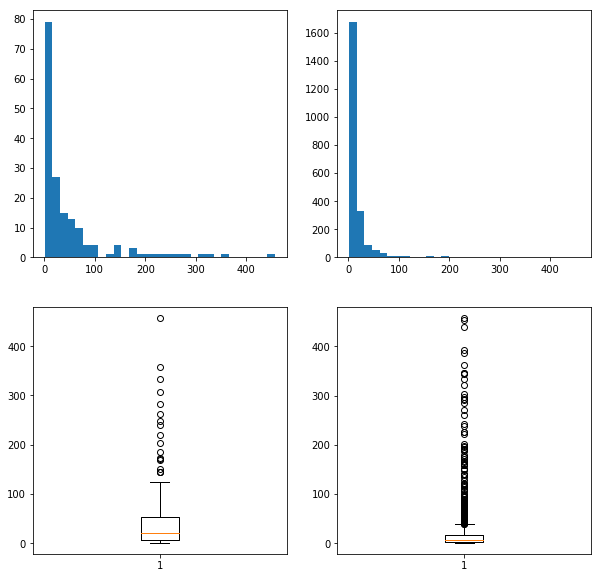

In [104]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(10)

axes[0,0].hist(badData[badData['cnt_max'] < 500]['cnt_max'], bins=30)
axes[0,1].hist(normalData[normalData['cnt_max'] < 500]['cnt_max'], bins=30)

axes[1,0].boxplot(badData[badData['cnt_max'] < 500]['cnt_max'])
axes[1,1].boxplot(normalData[normalData['cnt_max'] < 500]['cnt_max'])

plt.show()

# Create feature : QueryTS interval std and mean

In [122]:
qts = data[['FileID', 'CustomerID', 'QueryTS']].sort_values(by=['FileID', 'CustomerID','QueryTS'], ascending=True)

In [123]:
qts.head(10)

,FileID,CustomerID,QueryTS
75345,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488337320
75481,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488337354
76215,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488337552
110936,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488345621
257460,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488378351
366643,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488411397
366649,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488411399
373890,0087304d5bee451f0d82c7407b0fa7d1,501782bb051c5368f641f5299e550f32,1488333808
374372,0087304d5bee451f0d82c7407b0fa7d1,501782bb051c5368f641f5299e550f32,1488337357
374985,0087304d5bee451f0d82c7407b0fa7d1,501782bb051c5368f641f5299e550f32,1488345679


In [124]:
# calculate QueryTS interval
qts['QueryTS_diff'] = qts.groupby(['FileID', 'CustomerID'])['QueryTS'].apply(lambda x : x.diff())

In [125]:
qts.head(10)

,FileID,CustomerID,QueryTS,QueryTS_diff
75345,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488337320,NaN
75481,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488337354,34.0
76215,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488337552,198.0
110936,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488345621,8069.0
257460,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488378351,32730.0
366643,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488411397,33046.0
366649,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488411399,2.0
373890,0087304d5bee451f0d82c7407b0fa7d1,501782bb051c5368f641f5299e550f32,1488333808,NaN
374372,0087304d5bee451f0d82c7407b0fa7d1,501782bb051c5368f641f5299e550f32,1488337357,3549.0
374985,0087304d5bee451f0d82c7407b0fa7d1,501782bb051c5368f641f5299e550f32,1488345679,8322.0


In [126]:
qts.dropna()
qts['QueryTS_dd'] = qts.groupby(['FileID', 'CustomerID'])['QueryTS_diff'].transform(lambda x:(x.diff()))

In [127]:
qts = qts.dropna()
qts['QueryTS_dd'] = qts.groupby(['FileID', 'CustomerID'])['QueryTS_dd'].transform(lambda x:abs(x))

In [128]:
qts.head(10)

,FileID,CustomerID,QueryTS,QueryTS_diff,QueryTS_dd
76215,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488337552,198.0,164.0
110936,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488345621,8069.0,7871.0
257460,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488378351,32730.0,24661.0
366643,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488411397,33046.0,316.0
366649,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488411399,2.0,33044.0
374985,0087304d5bee451f0d82c7407b0fa7d1,501782bb051c5368f641f5299e550f32,1488345679,8322.0,4773.0
376300,0087304d5bee451f0d82c7407b0fa7d1,501782bb051c5368f641f5299e550f32,1488357967,12288.0,3966.0
378121,0087304d5bee451f0d82c7407b0fa7d1,501782bb051c5368f641f5299e550f32,1488376118,18151.0,5863.0
378313,0087304d5bee451f0d82c7407b0fa7d1,501782bb051c5368f641f5299e550f32,1488378382,2264.0,15887.0
379355,0087304d5bee451f0d82c7407b0fa7d1,501782bb051c5368f641f5299e550f32,1488403657,25275.0,23011.0


In [129]:
def checkOutlier(x):
    first_q = np.percentile(x, 25)
    third_q = np.percentile(x, 75)
    median = np.median(x)
    iqr = (third_q - first_q)
    return (x > (third_q + 1.5 * iqr)) | (x < (first_q - 1.5 * iqr))
    

qts['isOutlier'] = qts.groupby(['FileID', 'CustomerID'])['QueryTS_dd'].transform(checkOutlier)

In [131]:
qts.head(50)

,FileID,CustomerID,QueryTS,QueryTS_diff,QueryTS_dd,isOutlier
76215,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488337552,198.0,164.0,False
110936,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488345621,8069.0,7871.0,False
257460,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488378351,32730.0,24661.0,False
366643,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488411397,33046.0,316.0,False
366649,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488411399,2.0,33044.0,False
374985,0087304d5bee451f0d82c7407b0fa7d1,501782bb051c5368f641f5299e550f32,1488345679,8322.0,4773.0,False
376300,0087304d5bee451f0d82c7407b0fa7d1,501782bb051c5368f641f5299e550f32,1488357967,12288.0,3966.0,False
378121,0087304d5bee451f0d82c7407b0fa7d1,501782bb051c5368f641f5299e550f32,1488376118,18151.0,5863.0,False
378313,0087304d5bee451f0d82c7407b0fa7d1,501782bb051c5368f641f5299e550f32,1488378382,2264.0,15887.0,False
379355,0087304d5bee451f0d82c7407b0fa7d1,501782bb051c5368f641f5299e550f32,1488403657,25275.0,23011.0,False


In [132]:
qts = qts.drop(qts[qts['isOutlier'] == True].index)

In [133]:
qts.head(50)

,FileID,CustomerID,QueryTS,QueryTS_diff,QueryTS_dd,isOutlier
76215,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488337552,198.0,164.0,False
110936,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488345621,8069.0,7871.0,False
257460,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488378351,32730.0,24661.0,False
366643,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488411397,33046.0,316.0,False
366649,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488411399,2.0,33044.0,False
374985,0087304d5bee451f0d82c7407b0fa7d1,501782bb051c5368f641f5299e550f32,1488345679,8322.0,4773.0,False
376300,0087304d5bee451f0d82c7407b0fa7d1,501782bb051c5368f641f5299e550f32,1488357967,12288.0,3966.0,False
378121,0087304d5bee451f0d82c7407b0fa7d1,501782bb051c5368f641f5299e550f32,1488376118,18151.0,5863.0,False
378313,0087304d5bee451f0d82c7407b0fa7d1,501782bb051c5368f641f5299e550f32,1488378382,2264.0,15887.0,False
379355,0087304d5bee451f0d82c7407b0fa7d1,501782bb051c5368f641f5299e550f32,1488403657,25275.0,23011.0,False


In [134]:
qts['QueryTS_dd_std'] = qts.groupby(['FileID', 'CustomerID'])['QueryTS_dd'].transform(lambda x : np.std(x))
qts['QueryTS_dd_mean'] = qts.groupby(['FileID', 'CustomerID'])['QueryTS_dd'].transform(lambda x : np.mean(x))

In [135]:
qts.head(10)

,FileID,CustomerID,QueryTS,QueryTS_diff,QueryTS_dd,isOutlier,QueryTS_dd_std,QueryTS_dd_mean
76215,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488337552,198.0,164.0,False,13337.700123,13211.200000
110936,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488345621,8069.0,7871.0,False,13337.700123,13211.200000
257460,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488378351,32730.0,24661.0,False,13337.700123,13211.200000
366643,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488411397,33046.0,316.0,False,13337.700123,13211.200000
366649,0087304d5bee451f0d82c7407b0fa7d1,282396145a3df4452761bacf8049f6db,1488411399,2.0,33044.0,False,13337.700123,13211.200000
374985,0087304d5bee451f0d82c7407b0fa7d1,501782bb051c5368f641f5299e550f32,1488345679,8322.0,4773.0,False,7351.059190,11881.666667
376300,0087304d5bee451f0d82c7407b0fa7d1,501782bb051c5368f641f5299e550f32,1488357967,12288.0,3966.0,False,7351.059190,11881.666667
378121,0087304d5bee451f0d82c7407b0fa7d1,501782bb051c5368f641f5299e550f32,1488376118,18151.0,5863.0,False,7351.059190,11881.666667
378313,0087304d5bee451f0d82c7407b0fa7d1,501782bb051c5368f641f5299e550f32,1488378382,2264.0,15887.0,False,7351.059190,11881.666667
379355,0087304d5bee451f0d82c7407b0fa7d1,501782bb051c5368f641f5299e550f32,1488403657,25275.0,23011.0,False,7351.059190,11881.666667


In [136]:
qts_withlabel = pd.merge(qts, train_label, on='FileID', how='inner')

In [137]:
qts_withlabel[qts_withlabel['isBad'] == 1]

,FileID,CustomerID,QueryTS,QueryTS_diff,QueryTS_dd,isOutlier,QueryTS_dd_std,QueryTS_dd_mean,isBad
411,01bd94a0de82c68ebea242c033fcc0f7,282396145a3df4452761bacf8049f6db,1488331089,3605.0,3084.0,False,1043.336325,1289.75,1
412,01bd94a0de82c68ebea242c033fcc0f7,282396145a3df4452761bacf8049f6db,1488334686,3597.0,8.0,False,1043.336325,1289.75,1
413,01bd94a0de82c68ebea242c033fcc0f7,282396145a3df4452761bacf8049f6db,1488366563,3600.0,0.0,False,1043.336325,1289.75,1
414,01bd94a0de82c68ebea242c033fcc0f7,282396145a3df4452761bacf8049f6db,1488370163,3600.0,0.0,False,1043.336325,1289.75,1
415,01bd94a0de82c68ebea242c033fcc0f7,282396145a3df4452761bacf8049f6db,1488371125,962.0,2638.0,False,1043.336325,1289.75,1
416,01bd94a0de82c68ebea242c033fcc0f7,282396145a3df4452761bacf8049f6db,1488373763,2638.0,1676.0,False,1043.336325,1289.75,1
417,01bd94a0de82c68ebea242c033fcc0f7,282396145a3df4452761bacf8049f6db,1488374720,957.0,1681.0,False,1043.336325,1289.75,1
418,01bd94a0de82c68ebea242c033fcc0f7,282396145a3df4452761bacf8049f6db,1488377363,2643.0,1686.0,False,1043.336325,1289.75,1
419,01bd94a0de82c68ebea242c033fcc0f7,282396145a3df4452761bacf8049f6db,1488377884,521.0,2122.0,False,1043.336325,1289.75,1
420,01bd94a0de82c68ebea242c033fcc0f7,282396145a3df4452761bacf8049f6db,1488381484,3600.0,3079.0,False,1043.336325,1289.75,1


In [138]:
feature_qts = qts_withlabel[['FileID', 'QueryTS_dd_std','QueryTS_dd_mean']].groupby(['FileID']).agg('min')
feature_qts = feature_qts.reset_index()
print(feature_qts.shape)
feature_qts.head()

(1943, 3)


,FileID,QueryTS_dd_std,QueryTS_dd_mean
0,0087304d5bee451f0d82c7407b0fa7d1,7351.059190,11881.666667
1,00a0fadf6f4b4d244459b3bc8f6ee7fa,57.584627,38.243902
2,00a885e87beb6fb1f6ca6ee9eb783779,0.000000,2.000000
3,00a92b584bfcf58b70d5e965e91da03c,0.000000,2738.214286
4,00cc3e15a0f2aad83d53752c10fbd2e3,172.500000,542.500000


# Merge features

In [140]:
features = pd.merge(feature_cnt, feature_qts, on='FileID', how='outer')
features = features[features.columns.difference(['index'])]
features.head(10)

,FileID,QueryTS_dd_mean,QueryTS_dd_std,cnt_max,cnt_mean,cnt_min
0,0087304d5bee451f0d82c7407b0fa7d1,11881.666667,7351.059190,8,3.571429,2
1,0087e85caf760ff171b1774bafcafcae,NaN,NaN,1,1.000000,1
2,00a0fadf6f4b4d244459b3bc8f6ee7fa,38.243902,57.584627,79,65.500000,52
3,00a885e87beb6fb1f6ca6ee9eb783779,2.000000,0.000000,7,2.666667,1
4,00a92b584bfcf58b70d5e965e91da03c,2738.214286,0.000000,30,2.095238,1
5,00cc3e15a0f2aad83d53752c10fbd2e3,542.500000,172.500000,4,2.333333,1
6,00d37d5360716660f7f51b14053d4c8d,0.000000,0.000000,6,1.533333,1
7,00ff41de2fab610efb3a2a0a1e6a525e,386.000000,0.000000,3,1.333333,1
8,011369beb2e171a204a2d7ffe86fcda9,NaN,NaN,1,1.000000,1
9,013500ae273c0c641884ba7e2fd96047,17904.500000,7517.500000,4,1.137500,1


# handle NaN value

In [142]:
print(features.isnull().sum())
print(features.shape)

FileID               0
QueryTS_dd_mean    502
QueryTS_dd_std     502
cnt_max              0
cnt_mean             0
cnt_min              0
dtype: int64
(2445, 6)


In [143]:
# fill max interval std and max interval mean
features['QueryTS_dd_std'].fillna(features['QueryTS_dd_std'].max(), inplace=True)
features['QueryTS_dd_mean'].fillna(features['QueryTS_dd_mean'].max(), inplace=True)
features.head()

,FileID,QueryTS_dd_mean,QueryTS_dd_std,cnt_max,cnt_mean,cnt_min
0,0087304d5bee451f0d82c7407b0fa7d1,11881.666667,7351.059190,8,3.571429,2
1,0087e85caf760ff171b1774bafcafcae,75011.000000,31107.409196,1,1.000000,1
2,00a0fadf6f4b4d244459b3bc8f6ee7fa,38.243902,57.584627,79,65.500000,52
3,00a885e87beb6fb1f6ca6ee9eb783779,2.000000,0.000000,7,2.666667,1
4,00a92b584bfcf58b70d5e965e91da03c,2738.214286,0.000000,30,2.095238,1


# Merge label

In [144]:
newdata = pd.merge(features, train_label, on='FileID')
newdata.head(10)

,FileID,QueryTS_dd_mean,QueryTS_dd_std,cnt_max,cnt_mean,cnt_min,isBad
0,0087304d5bee451f0d82c7407b0fa7d1,11881.666667,7351.059190,8,3.571429,2,0
1,0087e85caf760ff171b1774bafcafcae,75011.000000,31107.409196,1,1.000000,1,0
2,00a0fadf6f4b4d244459b3bc8f6ee7fa,38.243902,57.584627,79,65.500000,52,0
3,00a885e87beb6fb1f6ca6ee9eb783779,2.000000,0.000000,7,2.666667,1,0
4,00a92b584bfcf58b70d5e965e91da03c,2738.214286,0.000000,30,2.095238,1,0
5,00cc3e15a0f2aad83d53752c10fbd2e3,542.500000,172.500000,4,2.333333,1,0
6,00d37d5360716660f7f51b14053d4c8d,0.000000,0.000000,6,1.533333,1,0
7,00ff41de2fab610efb3a2a0a1e6a525e,386.000000,0.000000,3,1.333333,1,0
8,011369beb2e171a204a2d7ffe86fcda9,75011.000000,31107.409196,1,1.000000,1,0
9,013500ae273c0c641884ba7e2fd96047,17904.500000,7517.500000,4,1.137500,1,0


In [145]:
newdata.to_csv('featureData.csv')

# Train model

In [180]:
y = newdata['isBad']
x = newdata[newdata.columns.difference(['FileID','isBad'])]

In [181]:
# split training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [183]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1711, 5)
(1711,)
(734, 5)
(734,)


In [258]:
from sklearn.utils import shuffle 

def train_batch_generator(x, y, bs):
    badIndex = y[y == 1].index
    goodIndex = y[y == 0].index
    print('bad index length : ' , len(badIndex))
    print('good index length : ' , len(goodIndex))
    
    badCnt = 0
    goodCnt = 0
    while(True):
        batch_x = pd.DataFrame()
        batch_y = pd.Series()
        
        for i in range(int(bs/2)):
            if(badCnt >= len(badIndex)):
                badIndex = shuffle(badIndex)
                badCnt = 0                
                
            batch_x = batch_x.append(x.loc[badIndex[badCnt]], ignore_index=True)
            batch_y = batch_y.append(pd.Series(y.loc[badIndex[badCnt]]), ignore_index=True)
            badCnt += 1
                
        for i in range(int(bs/2)):
            if(goodCnt >= len(goodIndex)):
                goodIndex = shuffle(goodIndex)
                goodCnt = 0
                
            batch_x = batch_x.append(x.loc[goodIndex[goodCnt]], ignore_index=True)
            batch_y = batch_y.append(pd.Series(y.loc[goodIndex[goodCnt]]), ignore_index=True)
            goodCnt += 1
        
        yield batch_x, batch_y

In [241]:
gen = train_batch_generator(x_train, y_train, 50)

In [199]:
batch_y

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
dtype: int64

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
gbmReg = GradientBoostingClassifier()

for i in range(100):
    x_train, y_train = next(gen)
    gbmReg.fit(x_train, y_train)

y_pred = gbmReg.predict(x_test)

In [119]:
y_pred

array([1, 1, 1, ..., 0, 0, 1])

In [120]:
# tpr = TP / P
P = (y_test == 1).sum()
TP = ((y_pred == 1) & (y_test == 1)).sum()
TPR = TP / P
print(P,TP,TPR)

256 127 0.49609375


In [121]:
# fpr = FP / N
N = (y_test == 0).sum()
FP = ((y_pred == 1) & (y_test == 0)).sum()
FPR = FP / N
print(N, FP, FPR)

3089 1254 0.405956620265
